In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SBAnational.csv')

/var/folders/nt/9wb2rhv97959gh0yy716ljlw0000gn/T/ipykernel_1881/2640212651.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


In [10]:
df.sample(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
664265,6728724010,G & K MANUFACTURING INC.,SUNNYVALE,CA,94089,MORTGAGE CAP. DEVEL CORP,CA,332212,25-Sep-03,2003,...,N,N,NaN,17-Dec-03,"$825,000.00",$0.00,P I F,$0.00,"$825,000.00","$825,000.00"
803555,8610374005,L A TAN,WHEATON,IL,60187,"PNC BANK, NATIONAL ASSOCIATION",DE,812112,14-Feb-05,2005,...,0,N,NaN,30-Sep-05,"$240,000.00",$0.00,P I F,$0.00,"$240,000.00","$180,000.00"
826922,8872424007,THE WILLIAMS BUSINESS GROUP LL,LAUREL,MD,20707,BBCN BANK,CA,453998,19-May-05,2005,...,0,N,NaN,31-May-05,"$11,000.00",$0.00,P I F,$0.00,"$11,000.00","$9,350.00"
873769,9440364003,PANEK'S GOLF CAR SERVICE CO,WINDSOR,NJ,8561,FULTON BANK OF NEW JERSEY,NJ,811118,14-Dec-05,2006,...,Y,N,NaN,31-Jan-06,"$168,998.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
248976,2752844002,FLASHBACK VIDEO,BOULDER,CO,80304,PUEBLO BK & TR CO,CO,512110,1-Feb-99,1999,...,N,N,NaN,30-Apr-99,"$187,000.00",$0.00,P I F,$0.00,"$187,000.00","$140,250.00"
750642,7835214010,TOY TOWN INC,FOX LAKE,IL,60020,U.S. BANK NATIONAL ASSOCIATION,OH,451120,22-Sep-04,2004,...,Y,N,7-Apr-06,30-Sep-04,"$25,468.00",$0.00,CHGOFF,"$21,055.00","$25,000.00","$12,500.00"
109342,1800925010,Kenneth Cahn,HOUSTON,TX,77020,JPMORGAN CHASE BANK NATL ASSOC,IL,442299,4-May-06,2006,...,Y,N,22-Oct-12,31-May-06,"$178,054.00",$0.00,CHGOFF,"$36,053.00","$50,000.00","$25,000.00"
251465,2768684007,LINDER'S GREENHOUSES INC,LAKE ELMO,MN,55042,TWIN CITIES-METRO CERT. DEVEL,MN,0,8-Feb-99,1999,...,0,N,NaN,14-Apr-99,"$284,000.00",$0.00,P I F,$0.00,"$284,000.00","$284,000.00"
33110,1250285002,JONATHAN P EVANS DBA IBUYUSEDL,ANDERSON,SC,29621,BANK OF AMERICA NATL ASSOC,NC,453998,30-Mar-05,2005,...,Y,N,NaN,30-Apr-08,"$5,000.00",$0.00,P I F,$0.00,"$5,000.00","$2,500.00"
455127,4408954000,MAGNOLIA TEXACO,MAGNOLIA,TX,77355,COMPASS BANK,AL,447110,30-Mar-01,2001,...,0,N,NaN,30-Apr-01,"$950,000.00",$0.00,P I F,$0.00,"$950,000.00","$712,500.00"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [12]:
DEFAULT = 'CHGOFF'
PIF = 'P I F'

samples = df.shape[0]

MIS_counts = df['MIS_Status'].value_counts()
pif_count = MIS_counts[PIF]
chgoff_count = MIS_counts[DEFAULT]
unknown = samples - pif_count - chgoff_count

print(f"{samples} total samples, with {pif_count} paid in full, {chgoff_count} defaulted and {unknown} null")


899164 total samples, with 739609 paid in full, 157558 defaulted and 1997 null


In [13]:

lates = df[(df['MIS_Status'] == PIF) & (df['ChgOffDate'].notnull())]
print(f"{len(lates)} late payments found")
lates.head()


4927 late payments found


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
558,1004176005,GREENLIFE MOBILE,SAN JOSE,CA,95132,BBCN BANK,CA,561730,7-Feb-06,2006,...,0,N,19-Oct-09,28-Feb-06,"$5,000.00",$0.00,P I F,"$3,330.00","$5,000.00","$4,250.00"
850,1005925000,GILLIAN'S DELICATESSEN & CATER,FLORAL PARK,NY,11001,JPMORGAN CHASE BANK NATL ASSOC,IL,722320,26-Mar-03,2003,...,N,N,29-Mar-06,31-Mar-03,"$15,000.00",$0.00,P I F,"$10,270.00","$15,000.00","$7,500.00"
853,1005936010,TRICAS MANAGEMENT SERVICES LLC,DALLAS,TX,75218,WELLS FARGO BANK NATL ASSOC,SD,621511,8-Feb-06,2006,...,Y,N,2-Feb-09,31-Mar-06,"$165,553.00",$0.00,P I F,"$97,486.00","$100,000.00","$50,000.00"
861,1005986003,CAPITAL EXPLOSION GRAPHIC DESI,UPPER MARLBORO (MARLBORO),MD,20774,BBCN BANK,CA,541430,8-Feb-06,2006,...,0,N,14-Aug-12,28-Feb-06,"$10,000.00",$0.00,P I F,"$2,310.00","$10,000.00","$8,500.00"
866,1006016007,C-BARB AND CONLEY PROMOTIONAL,HOUSTON,TX,77057,BBCN BANK,CA,421450,8-Feb-06,2006,...,0,N,1-Jun-09,28-Feb-06,"$5,000.00",$0.00,P I F,"$3,783.00","$5,000.00","$4,250.00"


In [14]:
most_common = df['BalanceGross'].mode()[0]

wierds = df[(df['BalanceGross'] != most_common)]
wierds

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
18555,1135885010,Francisco Ruiz dba Susquehanna,ALLENTOWN,PA,18103,BANK OF AMERICA NATL ASSOC,NC,811111,21-Dec-04,2005,...,T,N,NaN,31-Jan-05,"$39,875.00","$12,750.00",P I F,$0.00,"$13,000.00","$6,500.00"
28198,1211926008,GULF COAST COIL TUBING & NITRO,SCOTT,LA,70583,HOME BANK,LA,213112,1-Mar-06,2006,...,N,N,NaN,30-Jun-06,"$1,080,000.00","$827,875.00",P I F,$0.00,"$1,080,000.00","$810,000.00"
253953,2784255003,"NAR Enterprises, LLC",LAFAYETTE,CO,80026,JPMORGAN CHASE BANK NATL ASSOC,IL,722211,30-Oct-07,2008,...,Y,N,NaN,30-Nov-07,"$87,491.00","$25,000.00",P I F,$0.00,"$25,000.00","$12,500.00"
339776,3369895004,"Local Ocean Seafoods, Inc.",Newport,OR,97365,WEST COAST BANK,OR,722110,7-Apr-09,2009,...,Y,N,NaN,30-Apr-09,"$166,826.00","$37,100.00",P I F,$0.00,"$100,000.00","$50,000.00"
382117,3686985000,Planet Beach,Blue bell,PA,19422,PENN LIBERTY BANK,PA,812199,9-Oct-09,2010,...,Y,N,NaN,1-May-10,"$75,000.00","$43,127.00",P I F,$0.00,"$75,000.00","$37,500.00"
389415,3751605010,Bella's Resale Shop,Chicago,IL,60617,CENTIER BANK,IN,453310,16-Nov-09,2010,...,N,N,NaN,1-Jan-10,"$90,000.00","$84,617.00",P I F,$0.00,"$120,000.00","$60,000.00"
518257,5011163010,"OLSON, CLYDE & DARLENE",MARKESAN,WI,53946,BMO HARRIS BK NATL ASSOC,IL,713950,8-Sep-92,1992,...,N,N,NaN,31-Oct-92,"$245,000.00","$1,760.00",P I F,$0.00,"$245,000.00","$183,750.00"
534838,5225724003,GRANITE MFG STONEWORKS,HOLBROOK,NY,11741,"READYCAP LENDING, LLC",CA,327991,20-Feb-02,2002,...,0,N,NaN,30-Apr-02,"$825,000.00","$115,820.00",P I F,$0.00,"$825,000.00","$618,750.00"
759993,7960044006,BITS & CHIPS MACHINING CO. INC,MIDDLETOWN,OH,45044,SPRING VALLEY BANK,OH,333911,19-Oct-04,2005,...,N,N,NaN,30-Sep-05,"$1,070,000.00","$996,262.00",P I F,$0.00,"$1,070,000.00","$802,500.00"
766068,8047854007,DAYS INN OF CLEARFIELD,WILKES-BARRE,PA,18702,CUSTOMERS BANK,NJ,721110,3-Nov-04,2005,...,0,N,NaN,31-Jan-05,"$1,330,000.00","$395,476.00",P I F,$0.00,"$1,330,000.00","$997,500.00"


In [15]:
features_keep = ['Term', 'NewExist', 'NoEmp', 'UrbanRural', 'RevLineCr']

df[features_keep].sample(10)

,Term,NewExist,NoEmp,UrbanRural,RevLineCr
870360,240,1.0,1,1,0
163896,84,1.0,3,0,Y
185902,21,2.0,1,0,N
735693,84,1.0,2,1,Y
712861,84,1.0,7,1,0
436125,168,1.0,49,0,N
634176,27,2.0,1,2,Y
702546,63,1.0,5,2,0
268381,84,1.0,4,1,0
125434,12,1.0,65,0,Y


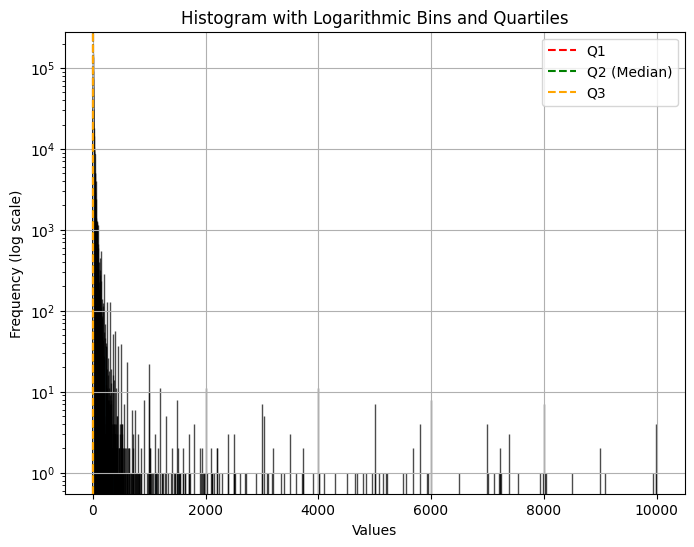

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['NoEmp'], bins='auto', alpha=0.7, color='skyblue', edgecolor='black', log=True)

# Calculate quartiles
q1 = df['NoEmp'].quantile(0.25)
q2 = df['NoEmp'].quantile(0.5)
q3 = df['NoEmp'].quantile(0.75)

# Overlay quartile lines
plt.axvline(q1, color='red', linestyle='--', label='Q1')
plt.axvline(q2, color='green', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='orange', linestyle='--', label='Q3')

plt.title('Histogram with Logarithmic Bins and Quartiles')
plt.xlabel('Values')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.grid(True)
plt.show()

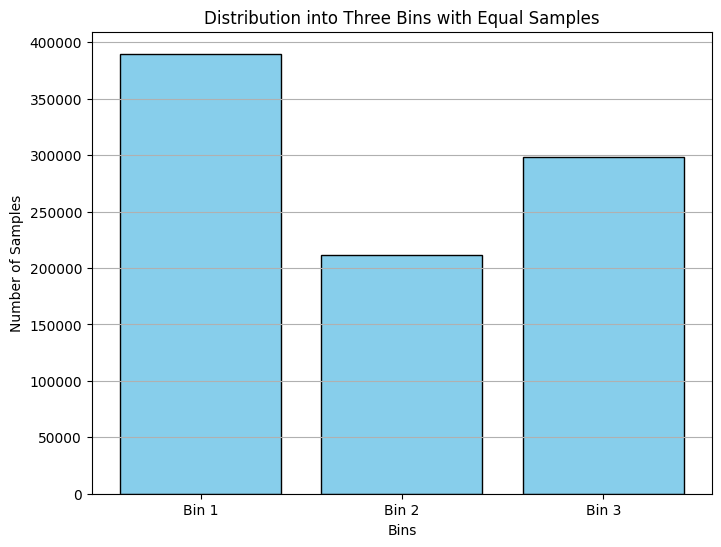

In [17]:


# Dividing data into three bins with equal samples
df['Bins'] = pd.qcut(df['NoEmp'], q=3, labels=['Bin 1', 'Bin 2', 'Bin 3'])

# Plotting a bar chart to represent the bins
bin_counts = df['Bins'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values, color='skyblue', edgecolor='black')

plt.title('Distribution into Three Bins with Equal Samples')
plt.xlabel('Bins')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()


In [18]:
df['FranchiseCode'].value_counts().head(20)

FranchiseCode
1        638554
0        208835
78760      3373
68020      1921
50564      1034
21780      1003
25650       715
79140       659
22470       615
17998       606
52000       576
24850       537
10528       435
67750       420
9050        378
21420       370
10465       365
72590       347
52875       333
38605       325
Name: count, dtype: int64

In [19]:
#df[(df['FranchiseCode'] != 1) & (df['FranchiseCode'] != 0)]
df[df['FranchiseCode'] == 79140]


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Bins
1227,1008446000,SUPER 8,PHILLIPS,WI,54555,WISCONSIN BUS. DEVEL FINAN COR,WI,721110,8-Feb-06,2006,...,N,NaN,14-Jun-06,"$204,000.00",$0.00,P I F,$0.00,"$204,000.00","$204,000.00",Bin 2
2583,1017194007,SUPER 8 - WARREN,WARREN,IN,46792,INDIANA STATEWIDE CERT. DEVEL,IN,0,7-Mar-97,1997,...,N,NaN,13-Sep-00,"$611,000.00",$0.00,P I F,$0.00,"$611,000.00","$611,000.00",Bin 2
3964,1026874001,"RANDAL MATAJI, LLC",FRANKLIN,TN,37067,AURORA BANK FSB,CO,0,11-Mar-97,1997,...,N,NaN,31-May-99,"$1,500,000.00",$0.00,P I F,$0.00,"$1,500,000.00","$750,000.00",Bin 3
4621,1031776003,MOORHEAD MOTEL GROUP LLC,MOORHEAD,MN,56560,DAKOTA CERT. DEVEL CO,ND,721110,13-Feb-06,2006,...,N,NaN,15-Nov-06,"$413,000.00",$0.00,P I F,$0.00,"$413,000.00","$413,000.00",Bin 3
7178,1048874002,SUPER 8 - SPRING VALLEY,SPRING VALLEY,CA,91977,COMERICA BANK,TX,0,19-Mar-97,1997,...,N,NaN,30-Apr-97,"$935,000.00",$0.00,P I F,$0.00,"$935,000.00","$701,250.00",Bin 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897094,9949973005,SUPER 8 MOTEL OF GRANITE FALLS,GRANITE FALLS,MN,56241,MINNESOTA BUS. FINAN CORP,MN,0,7-Feb-97,1997,...,N,NaN,11-Mar-98,"$373,000.00",$0.00,P I F,$0.00,"$373,000.00","$373,000.00",Bin 3
897445,9958043010,SUPER 8 MOTEL PROTHRO JUNCTION,LITTLE ROCK,AR,72117,"FIRST WESTERN SBLC, INC",TX,0,11-Feb-97,1997,...,N,NaN,30-Apr-97,"$1,295,000.00",$0.00,P I F,$0.00,"$1,295,000.00","$749,805.00",Bin 3
897973,9970623010,SUPER 8 MOTEL,WALDORF,MD,20601,"BUSINESS LOAN CENTER, LLC",SC,0,18-Feb-97,1997,...,N,12-Dec-00,31-Aug-97,"$1,000,000.00",$0.00,CHGOFF,"$401,468.00","$1,000,000.00","$750,000.00",Bin 3
898324,9977603007,SUPER 8,DILLON,SC,29536,WELLS FARGO BANK NATL ASSOC,SD,0,20-Feb-97,1997,...,N,NaN,30-Apr-97,"$1,183,000.00",$0.00,P I F,$0.00,"$1,277,000.00","$749,998.00",Bin 3


In [20]:
#df['UrbanRural'].value_counts()
#df['RevLineCr'].value_counts()
df['LowDoc'].value_counts()

LowDoc
N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: count, dtype: int64

In [21]:
#convert dollar values to float value
def dollar_to_float(dollar_string: str):
    return float(dollar_string.replace('$','').replace(',',''))

val = dollar_to_float('$1,560,275.23')
print(f"the value is:{val} and its type is: {type(val)}")


the value is:1560275.23 and its type is: <class 'float'>
